<a href="https://colab.research.google.com/github/majorquev/DBDC_202507_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [1]:
#install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(nycflights13)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

In [3]:
library(ggplot2)
library(dplyr)
# Histograma de frecuencias absolutas con R base.
set.seed(15)
data <- data.frame(x = rnorm(1000))
head(data)




,x
,<dbl>
1,0.2588229
2,1.8311207
3,-0.3396186
4,0.8971982
5,0.4880163
6,-1.2553858


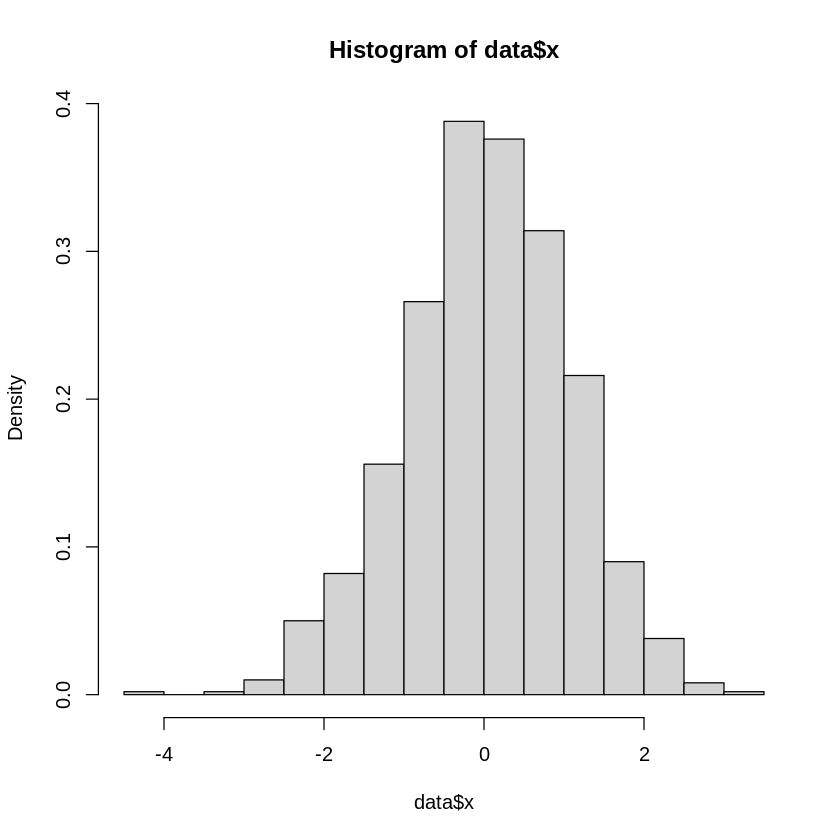

In [6]:
hist(data$x, freq = F)# Freq = T (defecto) muestra histograma de frecuencias absolutas, mientras que freq = F, genera histograma de densidades.

2.- Misma Visualización pero con Ggplot2 y etiquetas con `stat_bin()` y `geom = label`

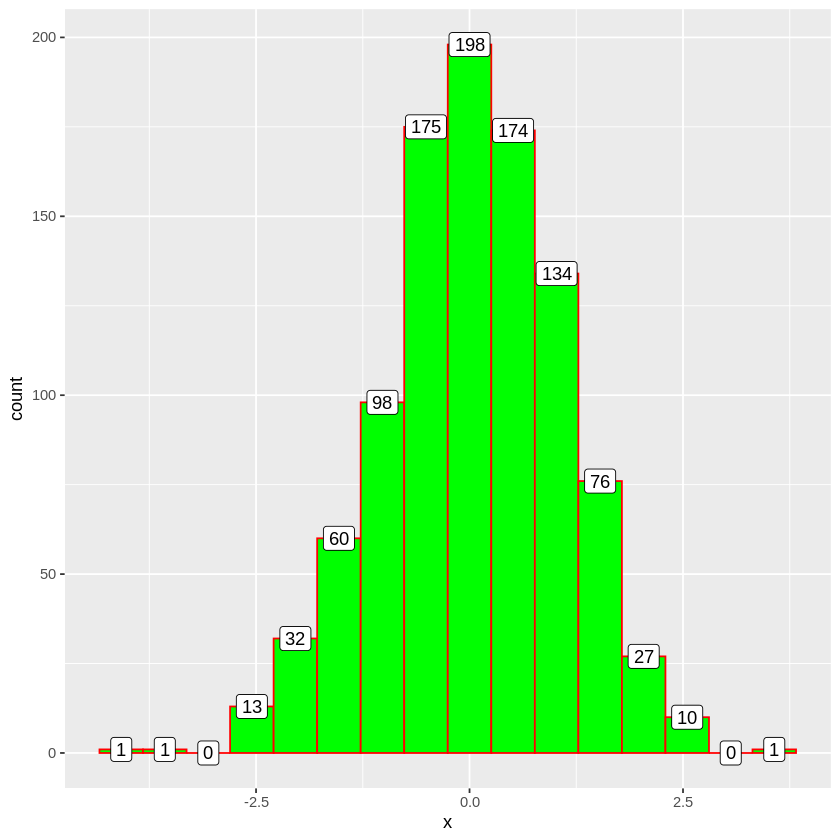

In [11]:
# ggplot2
# Histograma de frecuencias absolutas
data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 16,
    fill = "green",
    color = "red"
  ) +
  stat_bin(
    bins = 16,
    geom = "label",
    mapping = aes(label = after_stat(count))
  )


3.- Histograma de densidades, mismas visualizaciones.
 > Recordar: [Tipos de histogramas](https://math.stackexchange.com/questions/2666834/what-is-the-difference-between-frequency-and-density-in-a-histogram)



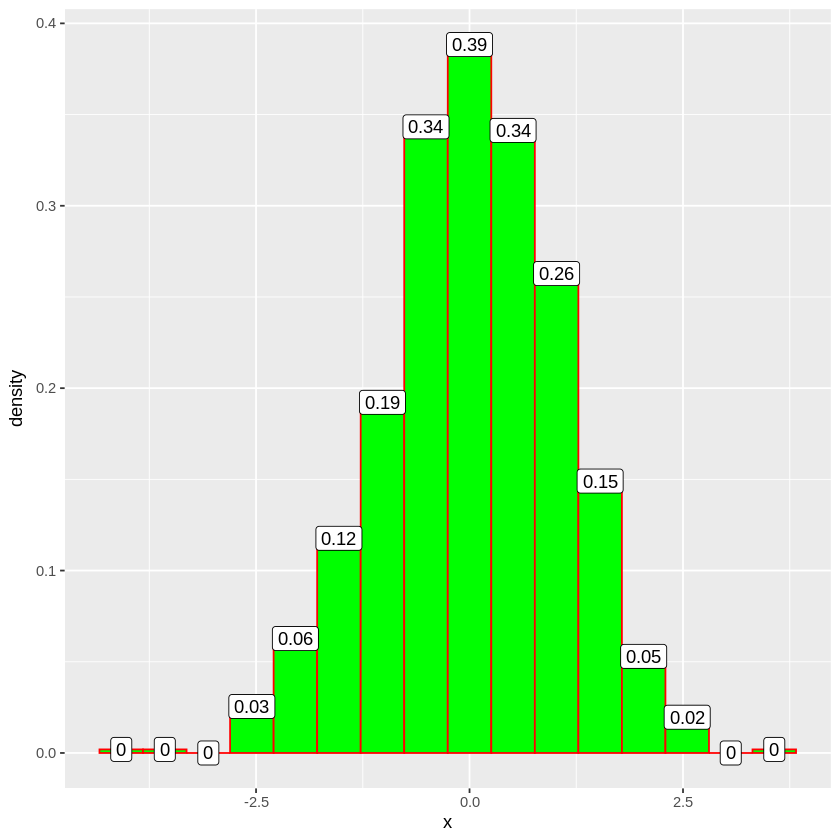

In [15]:
data %>%
  ggplot() +
  aes(x = x, y = after_stat(density)) +
  geom_histogram(
    bins = 16,
    fill = "green",
    color = "red"
  ) +
  stat_bin(
    bins = 16,
    geom = "label",
    mapping = aes(label = round(after_stat(density), 2) )
  )

## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para lo cual buscaremos visualizar la serie que contiene el total de vuelos por cada día.
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

In [16]:
?theme

In [17]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)

# A modo de ejemplo podemos visulizar el total de vuelos por día .

# Primero podemos generar est resumen de vuelos en un df


In [19]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [25]:
resumen <- flights %>%
  mutate(fecha = as.Date(time_hour)) %>%
  count(fecha)

In [26]:
head(resumen)

fecha,n
<date>,<int>
2013-01-01,709
2013-01-02,930
2013-01-03,917
2013-01-04,917
2013-01-05,768
2013-01-06,784


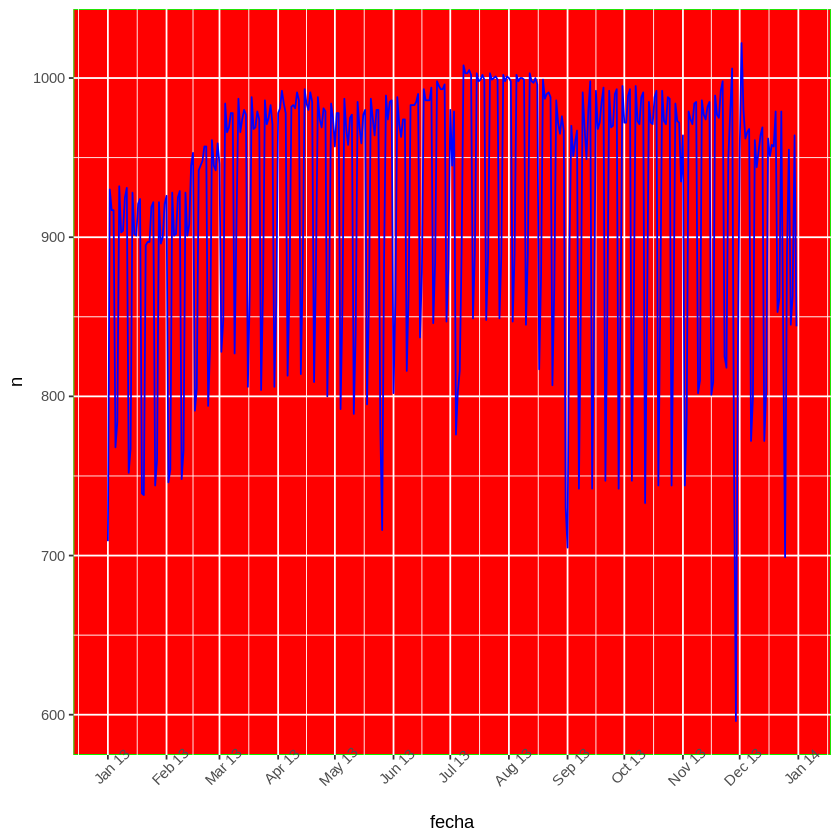

In [29]:
resumen %>%
  filter(fecha <= "2013-12-31") %>%
  ggplot() +
  aes(x = fecha, y = n )+
  geom_line(col = "blue") +
  theme(panel.background = element_rect(fill = "red", color = "green") ,
        axis.text.x = element_text(angle = 45)) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %y")
# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_bar()`, `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

 1. Construir un gráfico de barras con el total de vuelos por cada carrier.



In [ ]:
data(flights)

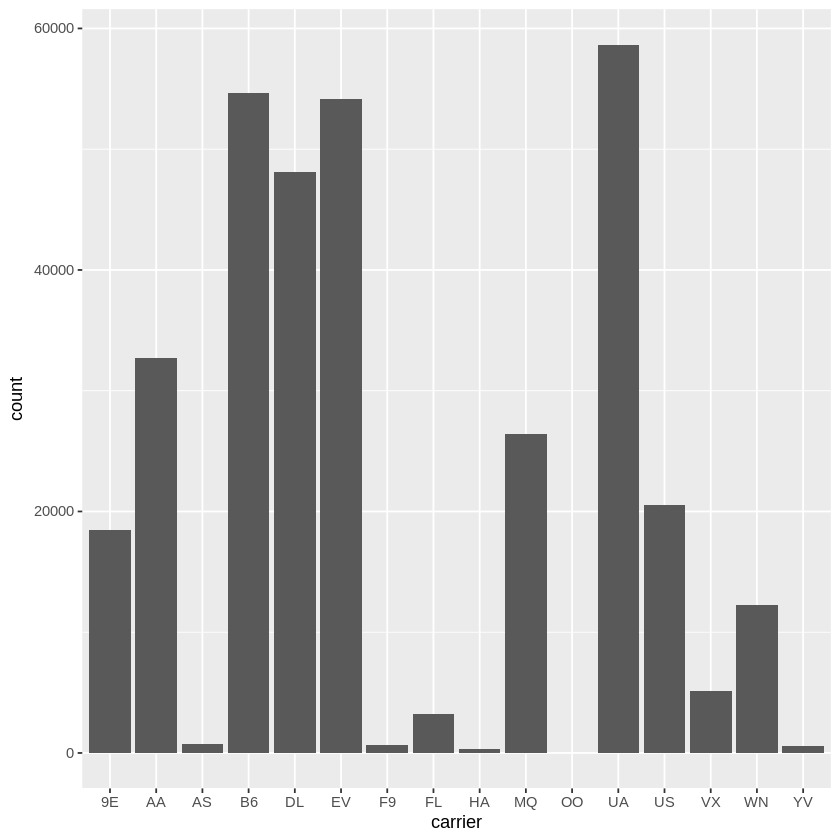

In [30]:
flights %>%
  ggplot() +
  aes(x = carrier) +
  geom_bar()

 2. Construir un gráfico de barras con el total de vuelos por cada carrier, pero considerando un dataframe con los conteos ya calculados.


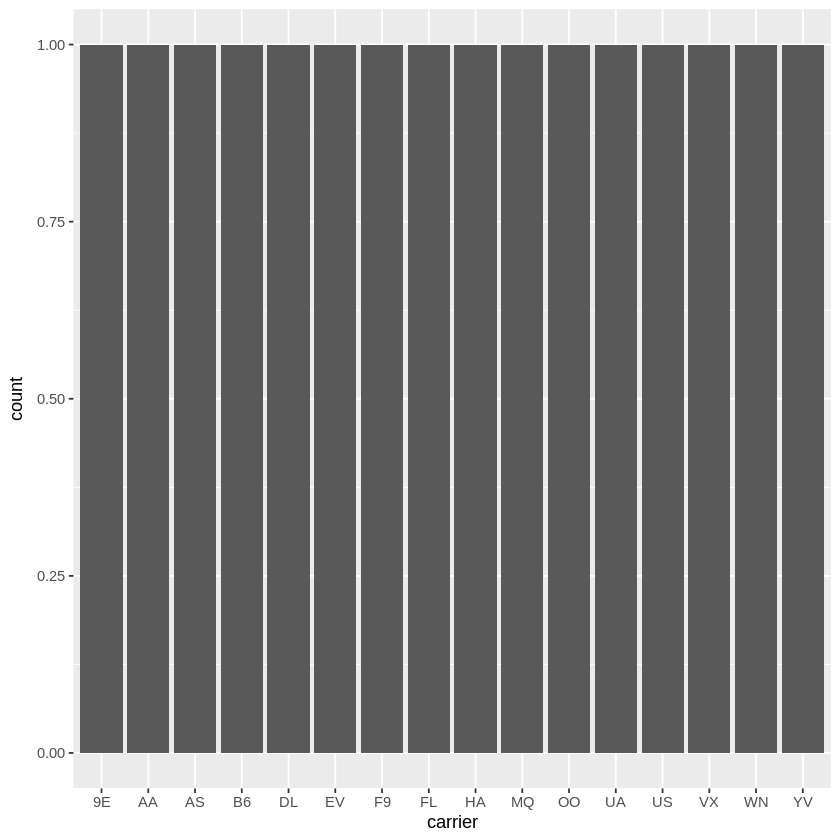

In [40]:
flights %>%
  count(carrier) %>%
  ggplot() +
  aes(x = carrier) +
  geom_bar()

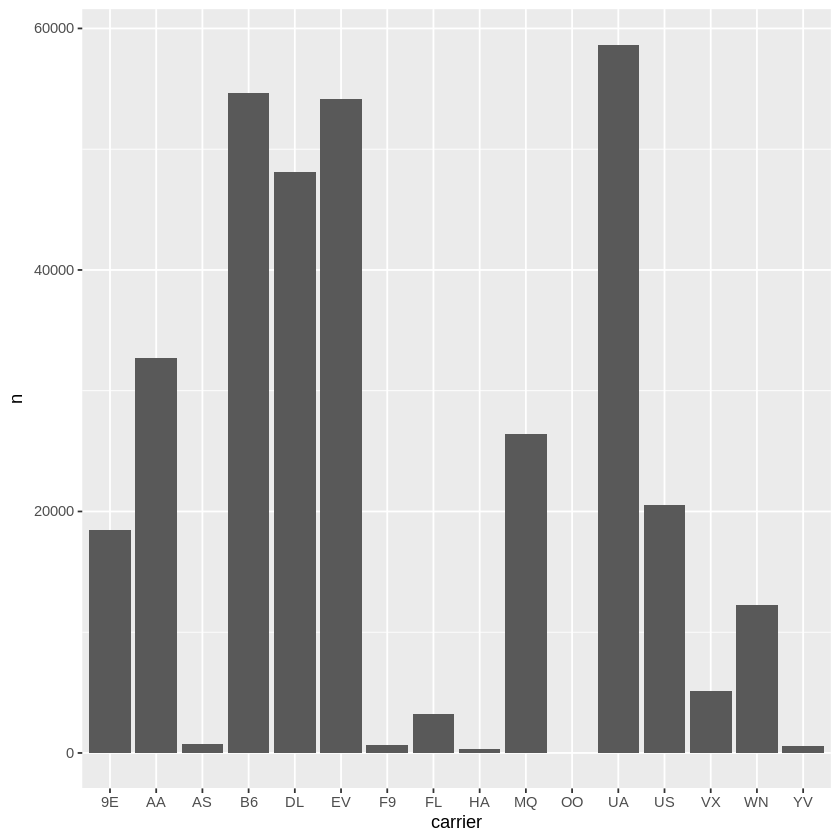

In [37]:
g2 <- flights %>%
  count(carrier) %>%
  ggplot() +
  aes(x = carrier, y = n) +
  geom_bar(stat = "identity")

g2

3. Añada etiquetas con los totales de vuelos en cada barra

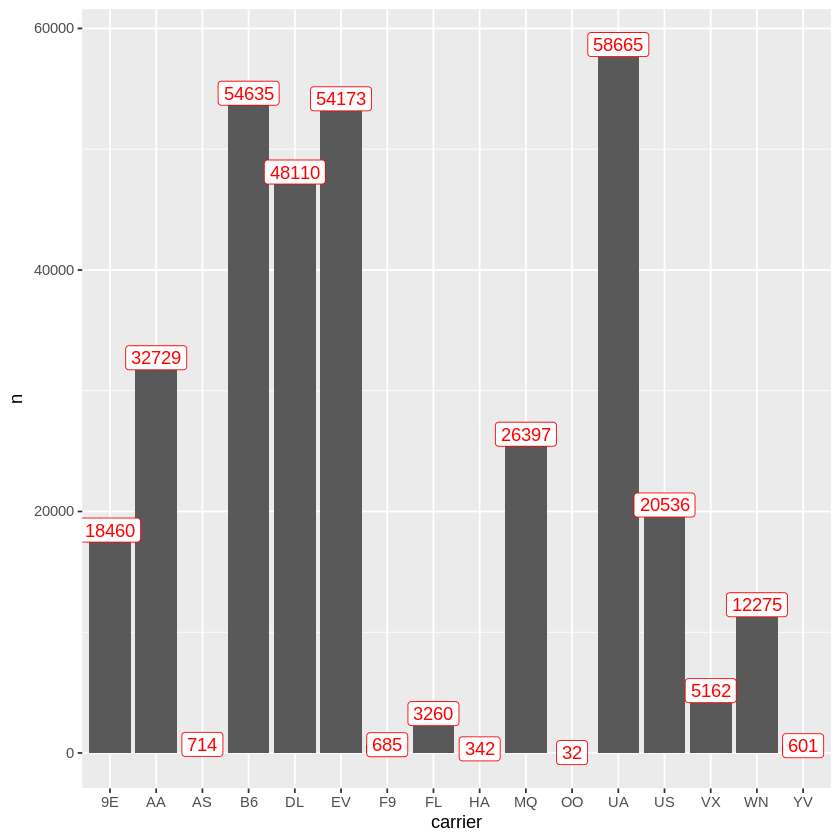

In [38]:
g2 +
  geom_label(mapping = aes(label = n), col = "red")

 4. Considere un gráfico de barras con los totales de vuelos por aeropuerto de destino, pero solo muestre aeropuertos de destino de ranking 1, 10 y 20 (según su cantidad de vuelos, donde 1 representa al aeropuerto de destino con mayor cantidad de vuelos).

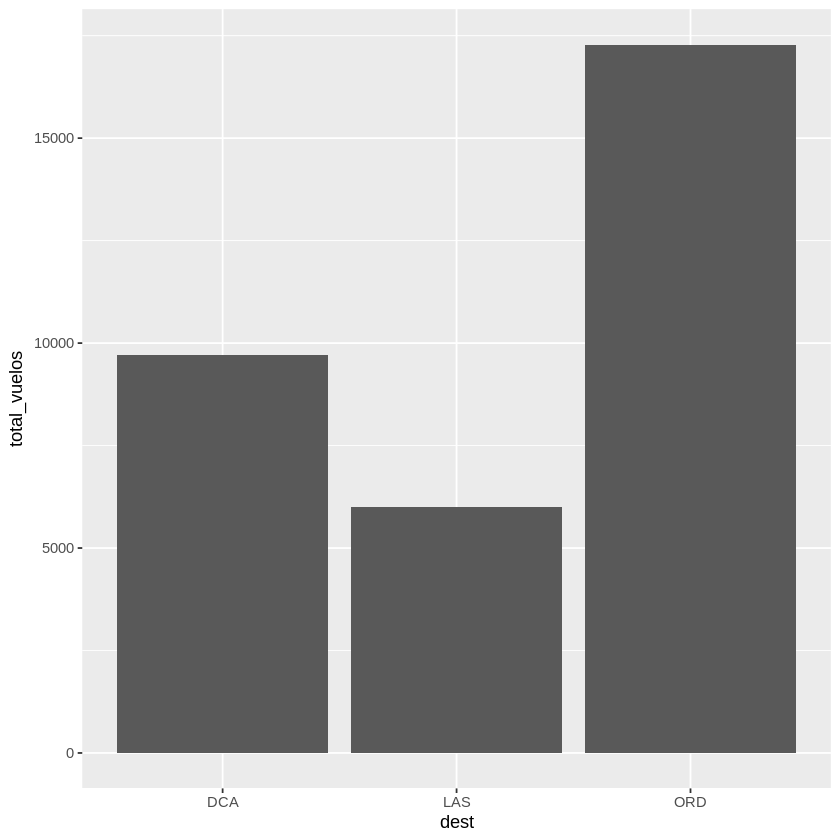

In [49]:
flights %>%
  group_by(dest) %>%
  summarise(total_vuelos = n()) %>%
  mutate(rk2 = dense_rank(desc(total_vuelos) )) %>%
  arrange(desc(total_vuelos)) %>% # Opción 1
  mutate(rk = row_number()) %>%# Opción 1
  filter(rk %in% c(1,10,20)) %>%
  ggplot() +
  aes(x = dest, y = total_vuelos) +
  geom_bar(stat = "identity")

 5. Para los aeropuertos identificados en el punto dos, construir un gráfico de barras stackeado (stacked barchart) que muestre el total de vuelos por aeropuerto de origen.

In [50]:
total_dest <- flights %>%
  count(dest, name = "total_dest") %>%
  arrange(desc(total_dest)) %>%
  mutate(rk = row_number())

In [51]:
# OP1
 aux <- flights %>%
  count(origin, dest, name = "total_orig_dest") %>%# filtrar donde dest in DCA, LAS y ORD NOOOO
  arrange(desc(dest)) %>%
  left_join(total_dest, by="dest") %>% # para entender que estamos distribuynto el total por destino en cada origen
  filter(rk %in% c(1,10,20))
aux

origin,dest,total_orig_dest,total_dest,rk
<chr>,<chr>,<int>,<int>,<int>
EWR,ORD,6100,17283,1
JFK,ORD,2326,17283,1
LGA,ORD,8857,17283,1
EWR,LAS,2010,5997,20
JFK,LAS,3987,5997,20
EWR,DCA,1719,9705,10
JFK,DCA,3270,9705,10
LGA,DCA,4716,9705,10


In [55]:
#OP2
aux2 <- flights %>%
  count(origin, dest, name = "total_orig_dest") %>%
  group_by(dest) %>%
  mutate(total_dest = sum(total_orig_dest)) %>%
  ungroup() %>% # Con esta funci{on le indicamos a R que no sonsidere los grupos definidos en group_by para las siguientes operaciones.
  mutate(rk = dense_rank(desc(total_dest))) %>%
  filter(rk %in% c(1,10,20)) %>%
  arrange(desc(total_dest))   # validar visualmente

aux2

origin,dest,total_orig_dest,total_dest,rk
<chr>,<chr>,<int>,<int>,<int>
EWR,ORD,6100,17283,1
JFK,ORD,2326,17283,1
LGA,ORD,8857,17283,1
EWR,DCA,1719,9705,10
JFK,DCA,3270,9705,10
LGA,DCA,4716,9705,10
EWR,LAS,2010,5997,20
JFK,LAS,3987,5997,20


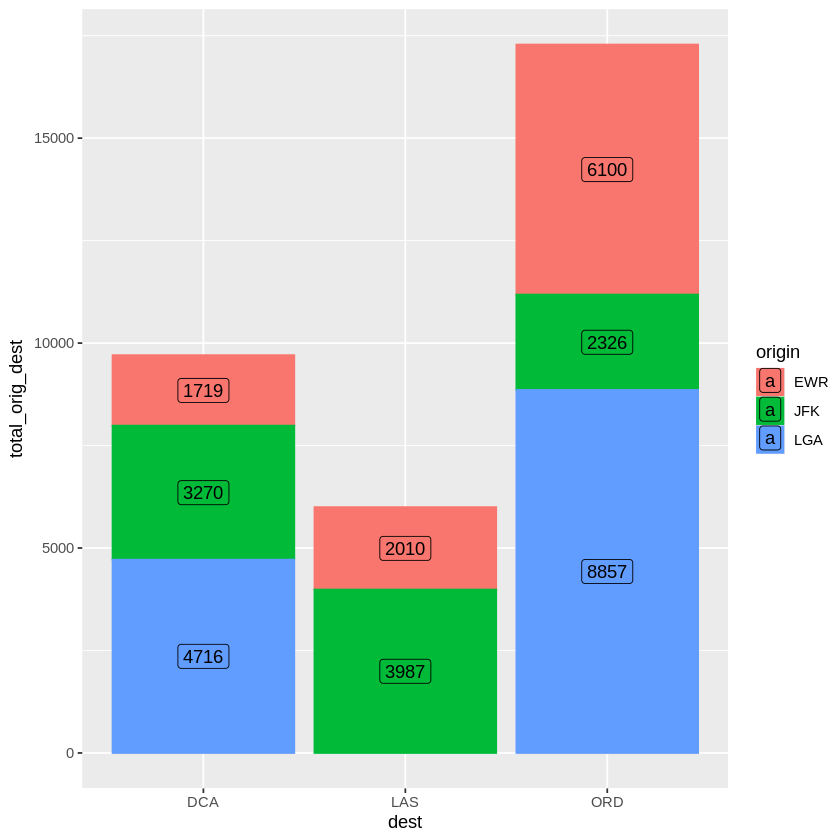

In [61]:
aux %>%
  ggplot() +
  aes(x = dest, y = total_orig_dest, color = origin, fill = origin) +
  geom_bar(stat = "identity") + # por defecto viene el stacked bar plot
  geom_label(mapping = aes(label = total_orig_dest), position = position_stack(vjust = 0.5) , color = "black")


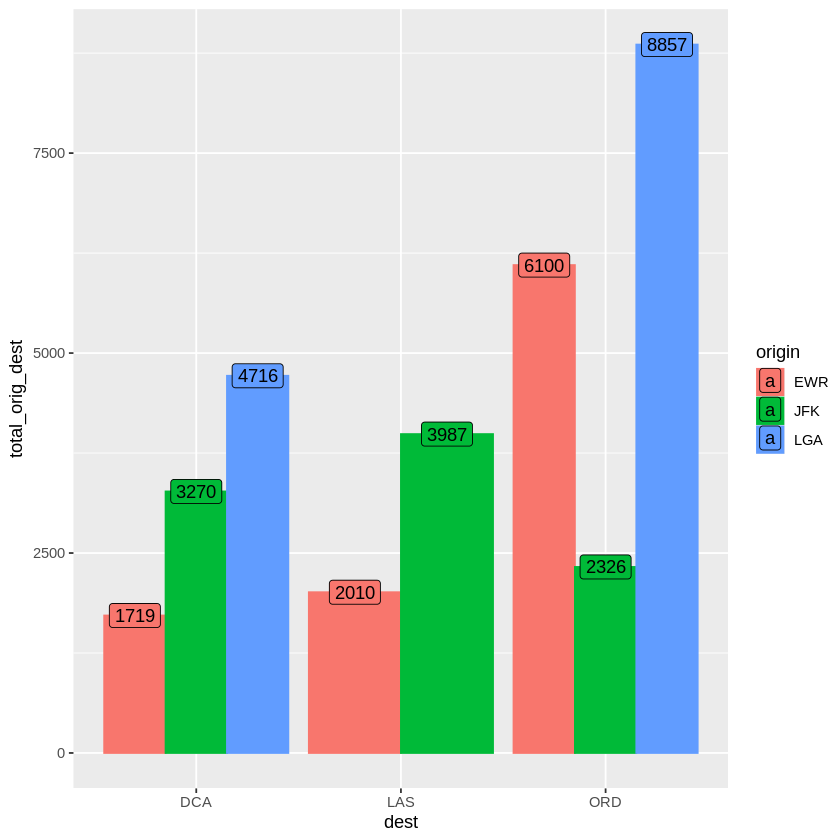

In [60]:
aux %>%
  ggplot() +
  aes(x = dest, y = total_orig_dest, color = origin, fill = origin) +
  geom_bar(stat = "identity", position = "dodge") +# por defecto viene el stacked bar plot
  geom_label(mapping = aes(label = total_orig_dest), position = position_dodge(width=0.9) , color = "black")

